# Warping tutorial
## h_localization_simu

##### May 2020
###### Eva Chamorro - Daniel Zitterbart - Julien Bonnel

## 1. Import packages

In [12]:
import os
import scipy.io as sio
import numpy as np
import cmath
#%matplotlib inline
#%matplotlib widget
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from warping_functions import *
from time_frequency_analysis_functions import *
from pekeris import *
from hamilton import *
import warnings
warnings.filterwarnings('ignore')

## 2. Load data

These are estimated dispersion curves obtained with
the previous code (g_warping_filtering_multiple_modes.m)
They will be used as data for localization



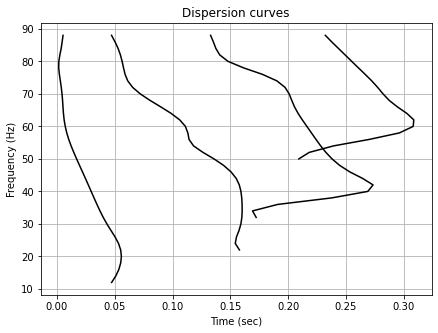

Continue


In [14]:
data_up = sio.loadmat(os.getcwd()+ '/data_for_loc.mat')

# Select variables
data=data_up['data']
freq_data=data_up['freq_data']
c1_true=data_up['c1_true']
c2_true=data_up['c2_true']
D_true=data_up['D_true']
rho1_true=data_up['rho1_true']
r_true=data_up['r_true']
dt_true=data_up['dt_true']

Nm=len(data[0,:]) ## number of modes
Nf=len(freq_data[0,:])

print('These are estimated dispersion curves obtained with')
print('the previous code (g_warping_filtering_multiple_modes.m)')
print('They will be used as data for localization')
print('')

plt.figure(figsize=(7,5))
plt.plot(data[:,0], freq_data[0,:],'black')
plt.plot(data[:,1], freq_data[0,:],'black')
plt.plot(data[:,2], freq_data[0,:],'black')
plt.plot(data[:,3], freq_data[0,:],'black')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.grid()
plt.title('Dispersion curves')
plt.show()

print('Continue')

## 2. Compute replicas

In [15]:
# We need to know some of the environmental parameters
c1=c1_true[0,0]
D=D_true[0,0]
rho1=rho1_true[0,0]


# We will look for range, seabed sound speed, and time shift on the
# following grids
r_=np.arange(5000,15100,100)
c2_=np.arange(1550,1710,10)
dt_=np.arange(-7,-5.995,0.005)


### NB: dt values should be roughly between rmin/c1 and rmax/c1. One can start with wide
###    search bounds and coarse steps for dt, and gradually narrow the bounds and decrease the steps.

Nr=len(r_)
Nc=len(c2_)
Nt=len(dt_)

fmin=freq_data[0,0]
fmax=freq_data[0,-1]
df=freq_data[0,1]-freq_data[0,0]

vg=np.zeros((Nc,Nm, Nf))


m_min=1
m_max=Nm

print('The first step is to compute replicas')
print('Computing replicas ....')

for cc in (np.arange(0,Nc)):
    c2=c2_[cc]
    rho2=hamilton(c2)*1000          
    [vg[cc,:,:],f_rep]=pek_vg(fmin,fmax,m_min,m_max,c1,c2,rho1,rho2,D,df)
       


print('Replicas computed!')
print('Continue')

The first step is to compute replicas
Computing replicas ....
Replicas computed!
Continue


## 3. Localization: impulsive sources

In [16]:
print('First, let us localize the source with Eq. (19),')
print('i.e. we know the source is an impulse')
print('Continue to proceed')

print('Starting localization')

J=np.zeros((Nt,Nr,Nc))
Nsteps=Nt*Nr
step=1

for tt in (np.arange(0,Nt)):
    
    for rr in (np.arange(0,Nr)):
        #waitbar(step/Nsteps,www,'Localization in progress ...');
        r=r_[rr]
        for cc in (np.arange(0,Nc)):
            rep=np.transpose(r/np.squeeze(vg[cc,:,:])+dt_[tt])
            J[tt,rr,cc]=np.nanmean(np.nanmean(abs(data-rep)**2))
        #end
        #step=step+1;
        
        
v = np.min(J[:,:,:])
tt_m,rr_m,cc_m=np.where(J == v)



dt_est=dt_[tt_m]
r_est=r_[rr_m]
c2_est=c2_[cc_m]


print('Localization done!')
print('')
print('')
print('Estimated range: ' + str(r_est[0]) +' m')
print('Estimated time shift: ' +str(dt_est[0])+ ' s')
print('Estimated seabed sound speed: ' +str(c2_est[0])+ ' m/s')
print('True values are: range ' + str(r_true[0,0]) +' m ; time shift '+ str(dt_true[0,0])+' s ; speed '+str(c2_true[0,0])+' m/s')
print('Continue to plot results')

First, let us localize the source with Eq. (19),
i.e. we know the source is an impulse
Continue to proceed
Starting localization
Localization done!
Estimated range: 9000 m
Estimated time shift: -6.035000000000021 s
Estimated seabed sound speed: 1650 m/s
True values are: range 10000 m ; time shift -0.024147575700035426 s ; speed 1600 m/s
Continue to plot results


## 3.1 Plot results

The top panel of the figure shows the data (in black) and the predicted dispersion curves
(i.e. the best replicas) in black. If there is not a good match
between the 2, then the localization is likely wrong
 
The bottom panel of the figure shows least square fit for range
If the curve is not relatively smooth with a marked minimum, then
the localization is likely wrong.


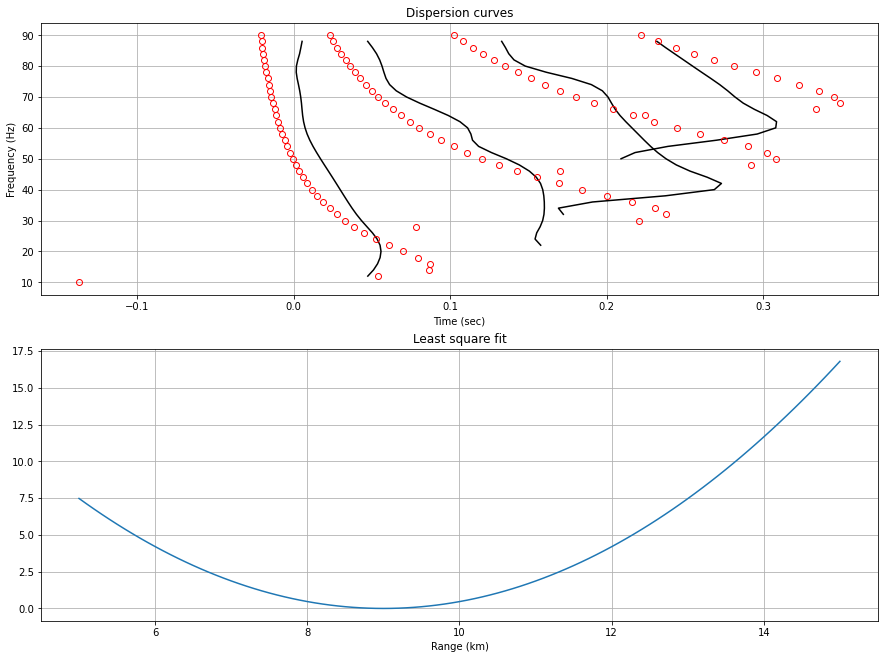

In [17]:
rep_est=r_est/np.squeeze(vg[cc_m,:,:])+dt_est

print('The top panel of the figure shows the data (in black) and the predicted dispersion curves')
print('(i.e. the best replicas) in black. If there is not a good match')
print('between the 2, then the localization is likely wrong')
print(' ')
print('The bottom panel of the figure shows least square fit for range')
print('If the curve is not relatively smooth with a marked minimum, then')
print('the localization is likely wrong.')


plt.figure(figsize=(15,11))
plt.subplot(211)
plt.plot(data[:,0], freq_data[0,:],'black')
plt.plot(data[:,1], freq_data[0,:],'black')
plt.plot(data[:,2], freq_data[0,:],'black')
plt.plot(data[:,3], freq_data[0,:],'black')

plt.plot(rep_est[0,:], freq_data[0,:],'or',fillstyle='none')
plt.plot(rep_est[1,:], freq_data[0,:],'or',fillstyle='none')
plt.plot(rep_est[2,:], freq_data[0,:],'or',fillstyle='none')
plt.plot(rep_est[3,:], freq_data[0,:],'or',fillstyle='none')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Dispersion curves')
plt.grid()
plt.subplot(212)
plt.plot(r_/1000,np.squeeze(J[tt_m,:,cc_m]))
plt.grid()
plt.xlabel('Range (km)')
plt.title('Least square fit')

plt.show()



## 4. Localization: non-impulsive sources

In [21]:
## Localization: non-impulsive sources
print('Now, let us localize the source with Eq. (20),')
print('i.e. we do not know if the source is an impulse')
print('')
print('')
print('')

Nm_inv=4
J=np.zeros((Nr,Nc, Nm_inv-1))


## we need common frequencies between modes. Let us verify the data
flag_data=0
for mm in np.arange(0,Nm_inv-1):
    
    data_ok=data[:,mm+1]-data[:,mm]
    na=np.where(~np.isnan(data_ok))
    
    if np.size(na) !=0:
        flag_data=1

        
if flag_data==0: ### there are no common frequency band between modes
    
    print('There are no common frequency band between modes')
    print('It is impossible to use Eq. (29)')
    print('Go back to the previous code, and redo the dispersion curve estimation')
    print('Make sure to have an overlap in frequency between the modes')
    print(' ')
    print('END')
    
else: ## there are common frequencies and we can proceed
    
    for rr in np.arange(0,Nr):
        r=r_[rr]
        #waitbar(rr/Nr,www,'Localization in progress ...');
        for cc in np.arange(0,Nc):
            
            for mm in np.arange(0,Nm_inv-1):
                rep=(r/np.squeeze(vg[cc,mm+1,:])-r/np.squeeze(vg[cc,mm,:]))
                data_ok=data[:,mm+1]-data[:,mm]
                
                N=np.size(np.where(~np.isnan(data_ok-rep)))
                if N==0:
                    J[rr,cc,mm]=np.nan
                #N=length(find(~isnan(data_ok-rep)));
                else:
                    J[rr,cc,mm]=np.nansum(np.nansum(np.abs(data_ok-rep)**2))/N

                    
                    
### sum over modes
J_ok=np.sum(J,axis=2)

v = np.nanmin(J_ok[:,:])
rr_m,cc_m=np.where(J_ok == v)

r_est=r_[rr_m]
c2_est=c2_[cc_m]

print('Localization done!')
print('')
print('')
print('Estimated range: '+str(r_est[0])+ ' m')
print('Estimated seabed sound speed: '+ str(c2_est[0])+ ' m/s')
print('True values are: range ' +str(r_true[0,0])+' m ; speed '+str(c2_true[0,0])+' m/s')
print('Continue to plot results')

Now, let us localize the source with Eq. (20),
i.e. we do not know if the source is an impulse



Localization done!


Estimated range: 6500 m
Estimated seabed sound speed: 1650 m/s
True values are: range 10000 m ; speed 1600 m/s
Continue to plot results


## 4.1 Plot results

The top panel of the figure shows the data (in black) and the best replicas
Remember that these are not dispersion curve, but dispersion curve differences
If there is not a good match between the 2, then the localization is likely wrong
 
The bottom panel of the figure shows least square fit for range
If the curve is not relatively smooth with a marked minimum, then
the localization is likely wrong.
Continue to conclude


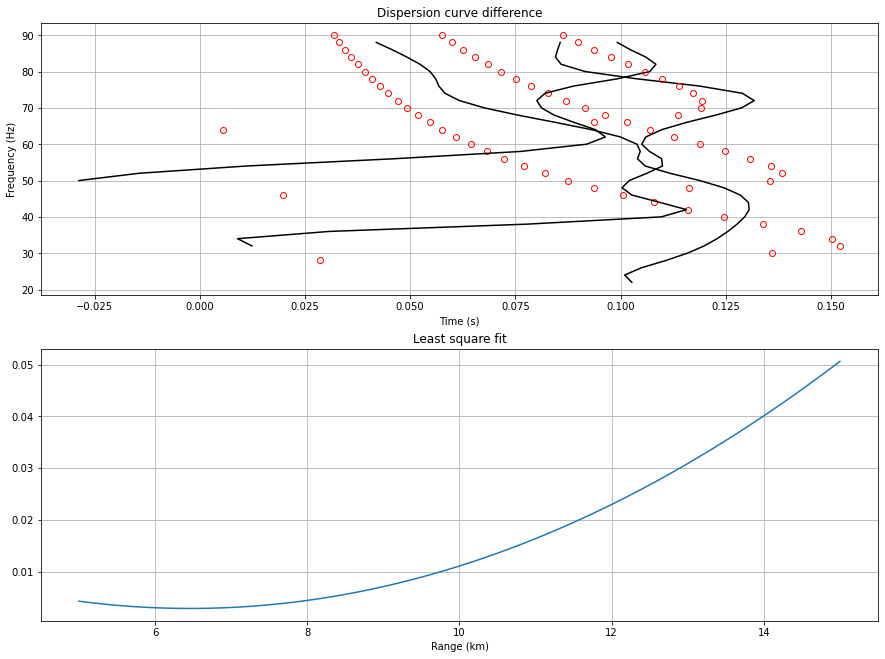

In [20]:
rep_est=np.zeros((Nf,Nm_inv-1))

for mm in np.arange(0,Nm_inv-1):
    rep_est[:,mm]=(r_est/np.squeeze(vg[cc_m,mm+1,:])-r_est/np.squeeze(vg[cc_m,mm,:]))
    
plt.figure(figsize=(15,11))
plt.subplot(211)
for mm in np.arange(0,Nm_inv-1):
    plt.plot(data[:,mm+1]-data[:,mm],freq_data[0,:],'black')
    plt.plot(rep_est[:,mm], freq_data[0,:], 'or',fillstyle='none')
    
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Dispersion curve difference')
    
plt.subplot(212)
plt.plot(r_/1000,np.squeeze(J_ok[:,cc_m])) 
plt.grid()
plt.xlabel('Range (km)')
plt.title('Least square fit')
  
    
print('The top panel of the figure shows the data (in black) and the best replicas')
print('Remember that these are not dispersion curve, but dispersion curve differences')
print('If there is not a good match between the 2, then the localization is likely wrong')
print(' ')
print('The bottom panel of the figure shows least square fit for range')
print('If the curve is not relatively smooth with a marked minimum, then')
print('the localization is likely wrong.')
print('Continue to conclude')

## 5. Concluding remarks

In [9]:
print('If the localization procedure went wrong')
print(' * verify that your input data are correct')
print(' * verify the the parameter grid you use is wide enough to include the true values')
print(' * look at the data/replica fit to understand what may be going on')
print('NB: replicas may contain points at early time that looks like outliers')
print('those are normal and predicted by the Pekeris waveguide model,')
print('they correspond to frequencies that are highly attenuated, ')
print('it is uncommon to see them on real data')
print(' ')
print('END')
    

If the localization procedure went wrong
 * verify that your input data are correct
 * verify the the parameter grid you use is wide enough to include the true values
 * look at the data/replica fit to understand what may be going on
NB: replicas may contain points at early time that looks like outliers
those are normal and predicted by the Pekeris waveguide model,
they correspond to frequencies that are highly attenuated, 
it is uncommon to see them on real data
 
END
